# Final Project Template

This workbook provides the template for the final project. 

## Instructions
- Work individually
- Please complete 1 copy of this template.
  - Complete all sections.
  - Feel free to include supporting material / slides / documents as needed.
- At the end of the project, you may be asked to present this workbook to the class (random selection).

### Submission Instructions
- Submit the .ipynb with the Output cells showing the results
  - Naming convention:
  ```
      <name1>-<name2>-<project_short_name>.ipynb
  ```
- If you provide your own datasets, include the data with your .ipynb, unless it is confidential

## Section 0: Name
### Meihong Lu

## Section 1: Project Title

### Average Avocado Price In US Market Estimator

## Section 2: Project Definition

### Goals

The goal of this project is to predict the average price of avocado, given weekly retail scan data on avocado prices and sales volume in multiple US markets from year 2015, 2016, 2017 and 2018. This could be used by retailers to check if their price is lower or higher than the average and adjust their sales strategy accordingly.

### Dataset

The dataset is taken from Kaggle: https://www.kaggle.com/rhuebner/human-resources-data-set (avocado.csv)

The dataset attributes are as follows:
1. index
2. Date - The date of the observation
3. AveragePrice - the average price of a single avocado
4. Total Volume - Total number of avocados sold (4046 + 4225 + 4770 + Total Bags)
5. 4046 - Total number of avocados with PLU 4046 sold
6. 4225 - Total number of avocados with PLU 4225 sold
7. 4770 - Total number of avocados with PLU 4770 sold
8. Total Bags - Total number of avocados in bags sold （Small Bags + Large Bags + XLarge Bags）
9. Small Bags
10. Large Bags
11. XLarge Bags
12. type - conventional or organic
13. year - the year
14. region - the city or region of the observation

### Tasks
 
1. Convert date column to be numeric columns in the dataset
2. Process the dataset to encode strings into labels
3. Remove outlier
4. Visualise the correlation using heatmap, pairplot and PCA
5. Use SelectKBest and PCA for feature engineering
6. Shuffle and split into train and test sets
7. Train a regression model, using algorithms 
8. Compute the metrics for the algorithm
9. Perform analysis for possible improvements

## Section 3: Data Engineering

Consider:
* Data Cleaning
* Data Exploration
* Imbalance / Data Sampling
* Data Encoding

In [1]:
# import library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

%matplotlib inline

### Load data

In [2]:
# read csv file and pass index_col=0 to tell that the first column is the index column
df = pd.read_csv('./avocado.csv', index_col=0) 
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


### Convert date column

In [4]:
# convert data folumn to date type
df['Date'] = pd.to_datetime(df['Date'])

# extract month and day to form new numeric features
df['quarter'] = df['Date'].dt.quarter
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [5]:
df['year'].unique()

array([2015, 2016, 2017, 2018])

In [6]:
df['month'].unique()

array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [7]:
df['quarter'].unique()

array([4, 3, 2, 1])

### Determine which columns need encoding

In [8]:
# check how many unique values are in type column
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [9]:
# check how many unique values are in region column
np.unique(df['region'], return_counts=True)

(array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
        'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
        'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
        'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
        'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
        'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
        'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
        'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
        'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
        'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
        'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
        'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
        'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object),
 array([338, 338, 338, 338, 338, 338, 338, 338, 338, 338, 338, 338, 338,
        338, 338, 338, 338, 338, 33

In [10]:
# number of happenings for region
len(set(df['region']))

54

### Label Encoding

In [11]:
# use label encoder as type column only has two unique values
le_region = LabelEncoder()
df['type_enc'] = le_region.fit_transform(df['type'])
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,quarter,month,day,type_enc
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,4,12,27,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,4,12,20,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,4,12,13,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,4,12,6,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,4,11,29,0


In [12]:
# use label encoder to further check if it is relevant feature
# not meaningful to use one-hot encoding as 
#   1. there are 54 unique regions which will result 54 additional features
#   2. and these features are probably not relavent to the problem to be solved
le_region = LabelEncoder()
df['region_enc'] = le_region.fit_transform(df['region'])
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,quarter,month,day,type_enc,region_enc
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,4,12,27,0,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,4,12,20,0,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,4,12,13,0,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,4,12,6,0,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,4,11,29,0,0


### Visualization to have better understanding of the relationship among price, sold volume, region and date

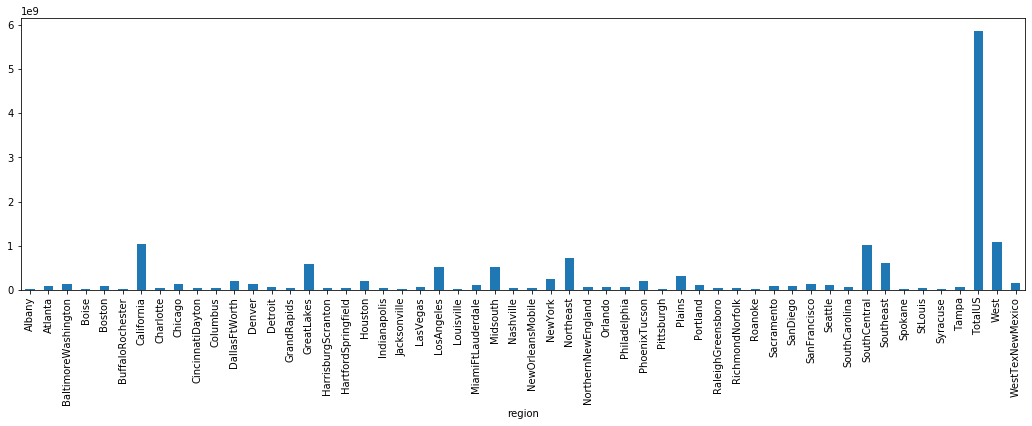

In [13]:
# plot the sum of total volume sold across region
df.groupby(['region'])['Total Volume'].sum().plot.bar(figsize=(18,5))
plt.show()

/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


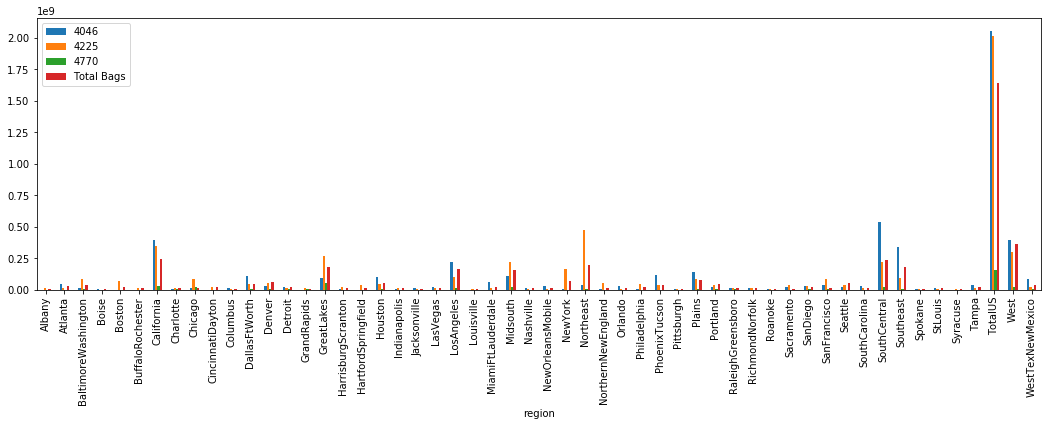

In [14]:
# plot the total sold volumes of each PLU and bag across region
df.groupby(['region'])['4046','4225','4770','Total Bags'].sum().plot.bar(figsize=(18,5))
plt.show()

In [15]:
# before removing total US rows
df.shape

(18249, 18)

In [16]:
### Remove rows where show the summed volumes of all regions of US (df[df['region']=='TotalUS'])
df = df[df['region'] != 'TotalUS']

In [17]:
# after removing total US rows
print(df.shape)
print("Total", 18249-df.shape[0], "rows are removed")

(17911, 18)
Total 338 rows are removed


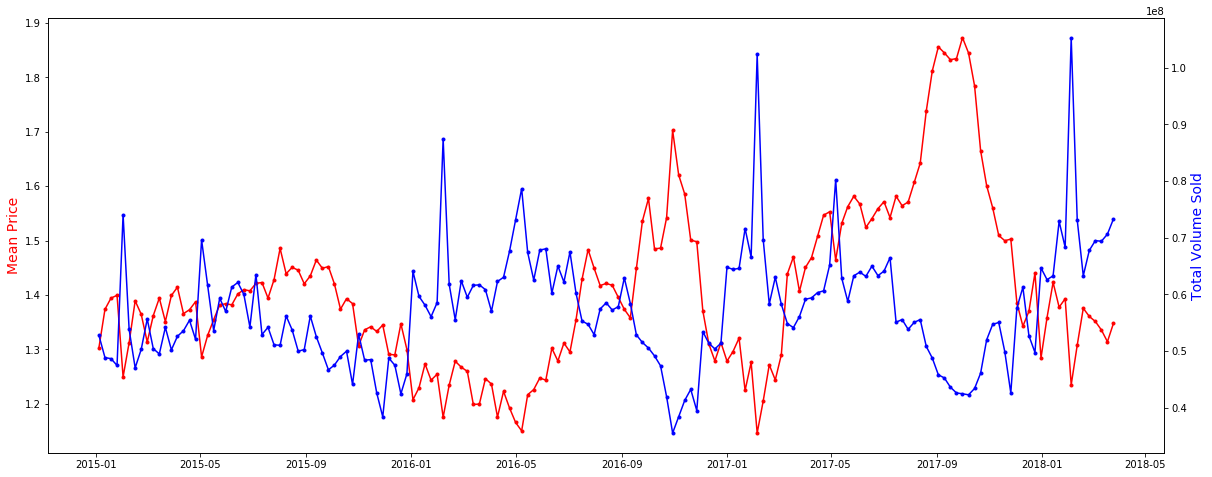

In [18]:
# plot the fluctuation of mean of average price vs. the total volume sold over the four years
fig,ax = plt.subplots(figsize=(20,8))
ax.plot(df.groupby(['Date'])['AveragePrice'].mean(), color="red", marker=".")
ax.set_ylabel("Mean Price",color="red",fontsize=14)

ax2=ax.twinx()
ax2.plot(df.groupby(['Date'])['Total Volume'].sum(), color="blue", marker=".")
ax2.set_ylabel("Total Volume Sold",color="blue",fontsize=14)

plt.show()

#### Observations:
* interestingly, the price dropped greatly during Feb 2017 and had a sudden increase during Sep, Oct, Nov 2017
* it seems that the average price follows similar pattern every year which price drops at first quarter and fourth quarter and price increases at second and third quarter
* in general, the trend follows that when price decreases, the volumes sold increases

/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


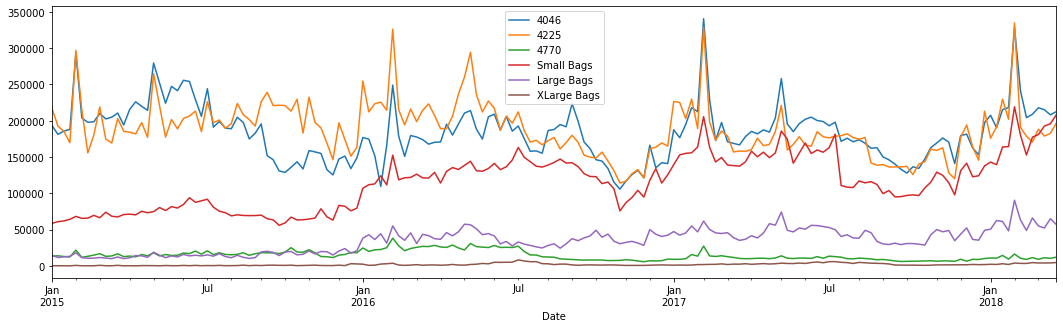

In [19]:
# plot the fluctuation of mean of average price for the three years
df.groupby(['Date'])['4046','4225', '4770','Small Bags', 'Large Bags', 'XLarge Bags'].mean().plot(figsize=(18,5))
plt.show()

### Drop useless columns which have been converted to new columns

In [20]:
# drop object columns 
df.drop(columns=['type','region','Date'], inplace=True)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,quarter,month,day,type_enc,region_enc
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,4,12,27,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,4,12,20,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,4,12,13,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,4,12,6,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,4,11,29,0,0


### Check missing value

In [21]:
# Check for null values
df[df.isnull().any(axis=1)]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,quarter,month,day,type_enc,region_enc


In [22]:
# now everything is numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17911 entries, 0 to 11
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  17911 non-null  float64
 1   Total Volume  17911 non-null  float64
 2   4046          17911 non-null  float64
 3   4225          17911 non-null  float64
 4   4770          17911 non-null  float64
 5   Total Bags    17911 non-null  float64
 6   Small Bags    17911 non-null  float64
 7   Large Bags    17911 non-null  float64
 8   XLarge Bags   17911 non-null  float64
 9   year          17911 non-null  int64  
 10  quarter       17911 non-null  int64  
 11  month         17911 non-null  int64  
 12  day           17911 non-null  int64  
 13  type_enc      17911 non-null  int64  
 14  region_enc    17911 non-null  int64  
dtypes: float64(9), int64(6)
memory usage: 2.2 MB


### Check if Average Price is gaussian distribution

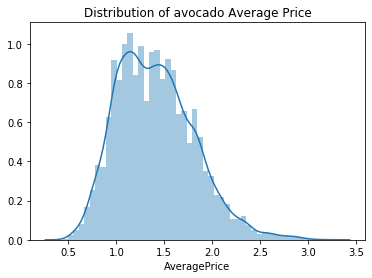

In [23]:
sns.distplot(df["AveragePrice"])
plt.title("Distribution of avocado Average Price") # nearly gaussian distribution
plt.show()

### Find outlier

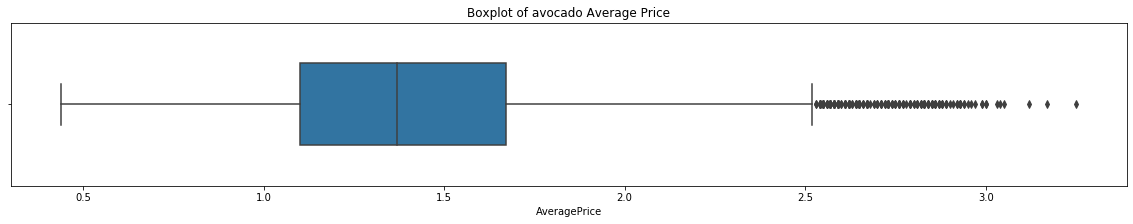

In [24]:
# boxplot to find outliers
plt.figure(figsize=(20, 3))

sns.boxplot(df["AveragePrice"], width=0.5)
plt.title("Boxplot of avocado Average Price")
plt.show()

### Remove outlier

In [25]:
df.shape

(17911, 15)

In [26]:
# tried feature engineering before removing outlier, 
## found out that removing outlier improved a bit on the correlation score
df = df[df['AveragePrice']<=2.52]

In [27]:
print(df.shape)
print("Total", 17911-df.shape[0], "rows are removed")

(17718, 15)
Total 193 rows are removed


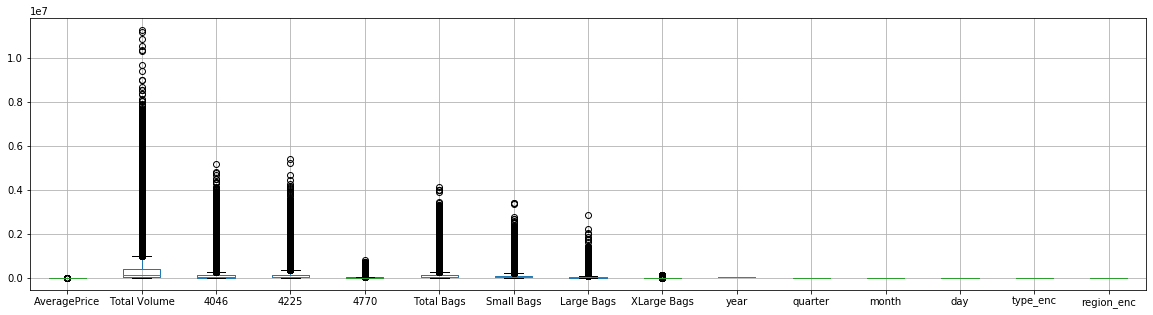

In [28]:
df.boxplot(figsize=(20,5))

## Section 4: Feature Engineering

In [29]:
# pearson correlation
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,quarter,month,day,type_enc,region_enc
AveragePrice,1.000000,-0.350024,-0.350812,-0.269746,-0.245473,-0.312242,-0.299900,-0.254142,-0.155265,0.077644,0.162914,0.152925,0.028977,0.619256,-0.022679
Total Volume,-0.350024,1.000000,0.894857,0.872309,0.648644,0.924840,0.920615,0.668084,0.537982,0.033352,-0.043092,-0.041710,-0.017578,-0.413511,0.097118
4046,-0.350812,0.894857,1.000000,0.602835,0.508727,0.776036,0.761243,0.589219,0.435759,0.006379,-0.039567,-0.037500,-0.015824,-0.346042,0.145606
4225,-0.269746,0.872309,0.602835,1.000000,0.622915,0.753907,0.782503,0.465478,0.449388,-0.013075,-0.035302,-0.035348,-0.021194,-0.392616,0.018692
4770,-0.245473,0.648644,0.508727,0.622915,1.000000,0.552865,0.565768,0.342532,0.587653,-0.048691,-0.045211,-0.044630,-0.012524,-0.293068,-0.058284
Total Bags,-0.312242,0.924840,0.776036,0.753907,0.552865,1.000000,0.969536,0.787632,0.554764,0.125699,-0.038957,-0.037257,-0.008710,-0.373454,0.104967
Small Bags,-0.299900,0.920615,0.761243,0.782503,0.565768,0.969536,1.000000,0.613384,0.587121,0.111593,-0.039530,-0.037465,-0.006675,-0.374618,0.073346
Large Bags,-0.254142,0.668084,0.589219,0.465478,0.342532,0.787632,0.613384,1.000000,0.266766,0.121099,-0.026660,-0.026382,-0.011569,-0.261196,0.159351
XLarge Bags,-0.155265,0.537982,0.435759,0.449388,0.587653,0.554764,0.587121,0.266766,1.000000,0.111954,-0.017698,-0.016223,0.000477,-0.238932,-0.041580
year,0.077644,0.033352,0.006379,-0.013075,-0.048691,0.125699,0.111593,0.121099,0.111954,1.000000,-0.178172,-0.179486,0.005338,-0.006063,-0.001003


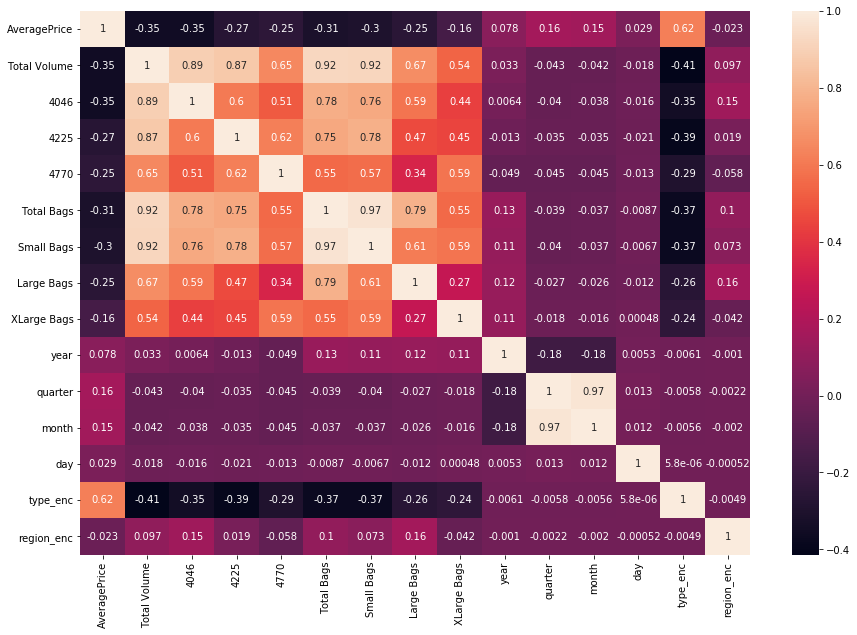

In [30]:
# heatmap
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, ax=ax)
plt.show()

#### Observations:
* "Total Volume" as high correlation with "4046", "4225", "Total Bags", "Small Bags", therefore, we can drop these features and keep "Total Volume" feature as it has slightly higher correlation with "AveragePrice" compared to others 
* "quarter" has high correlation with "month", therefore, we keep "quarter" feature as it has slightly higher correlation with "AveragePrice" compared to "month"
* other features which are less than 0.1 correlation will not be used
* as we are predicting the average price across US, region is not a meaningful feature to this question

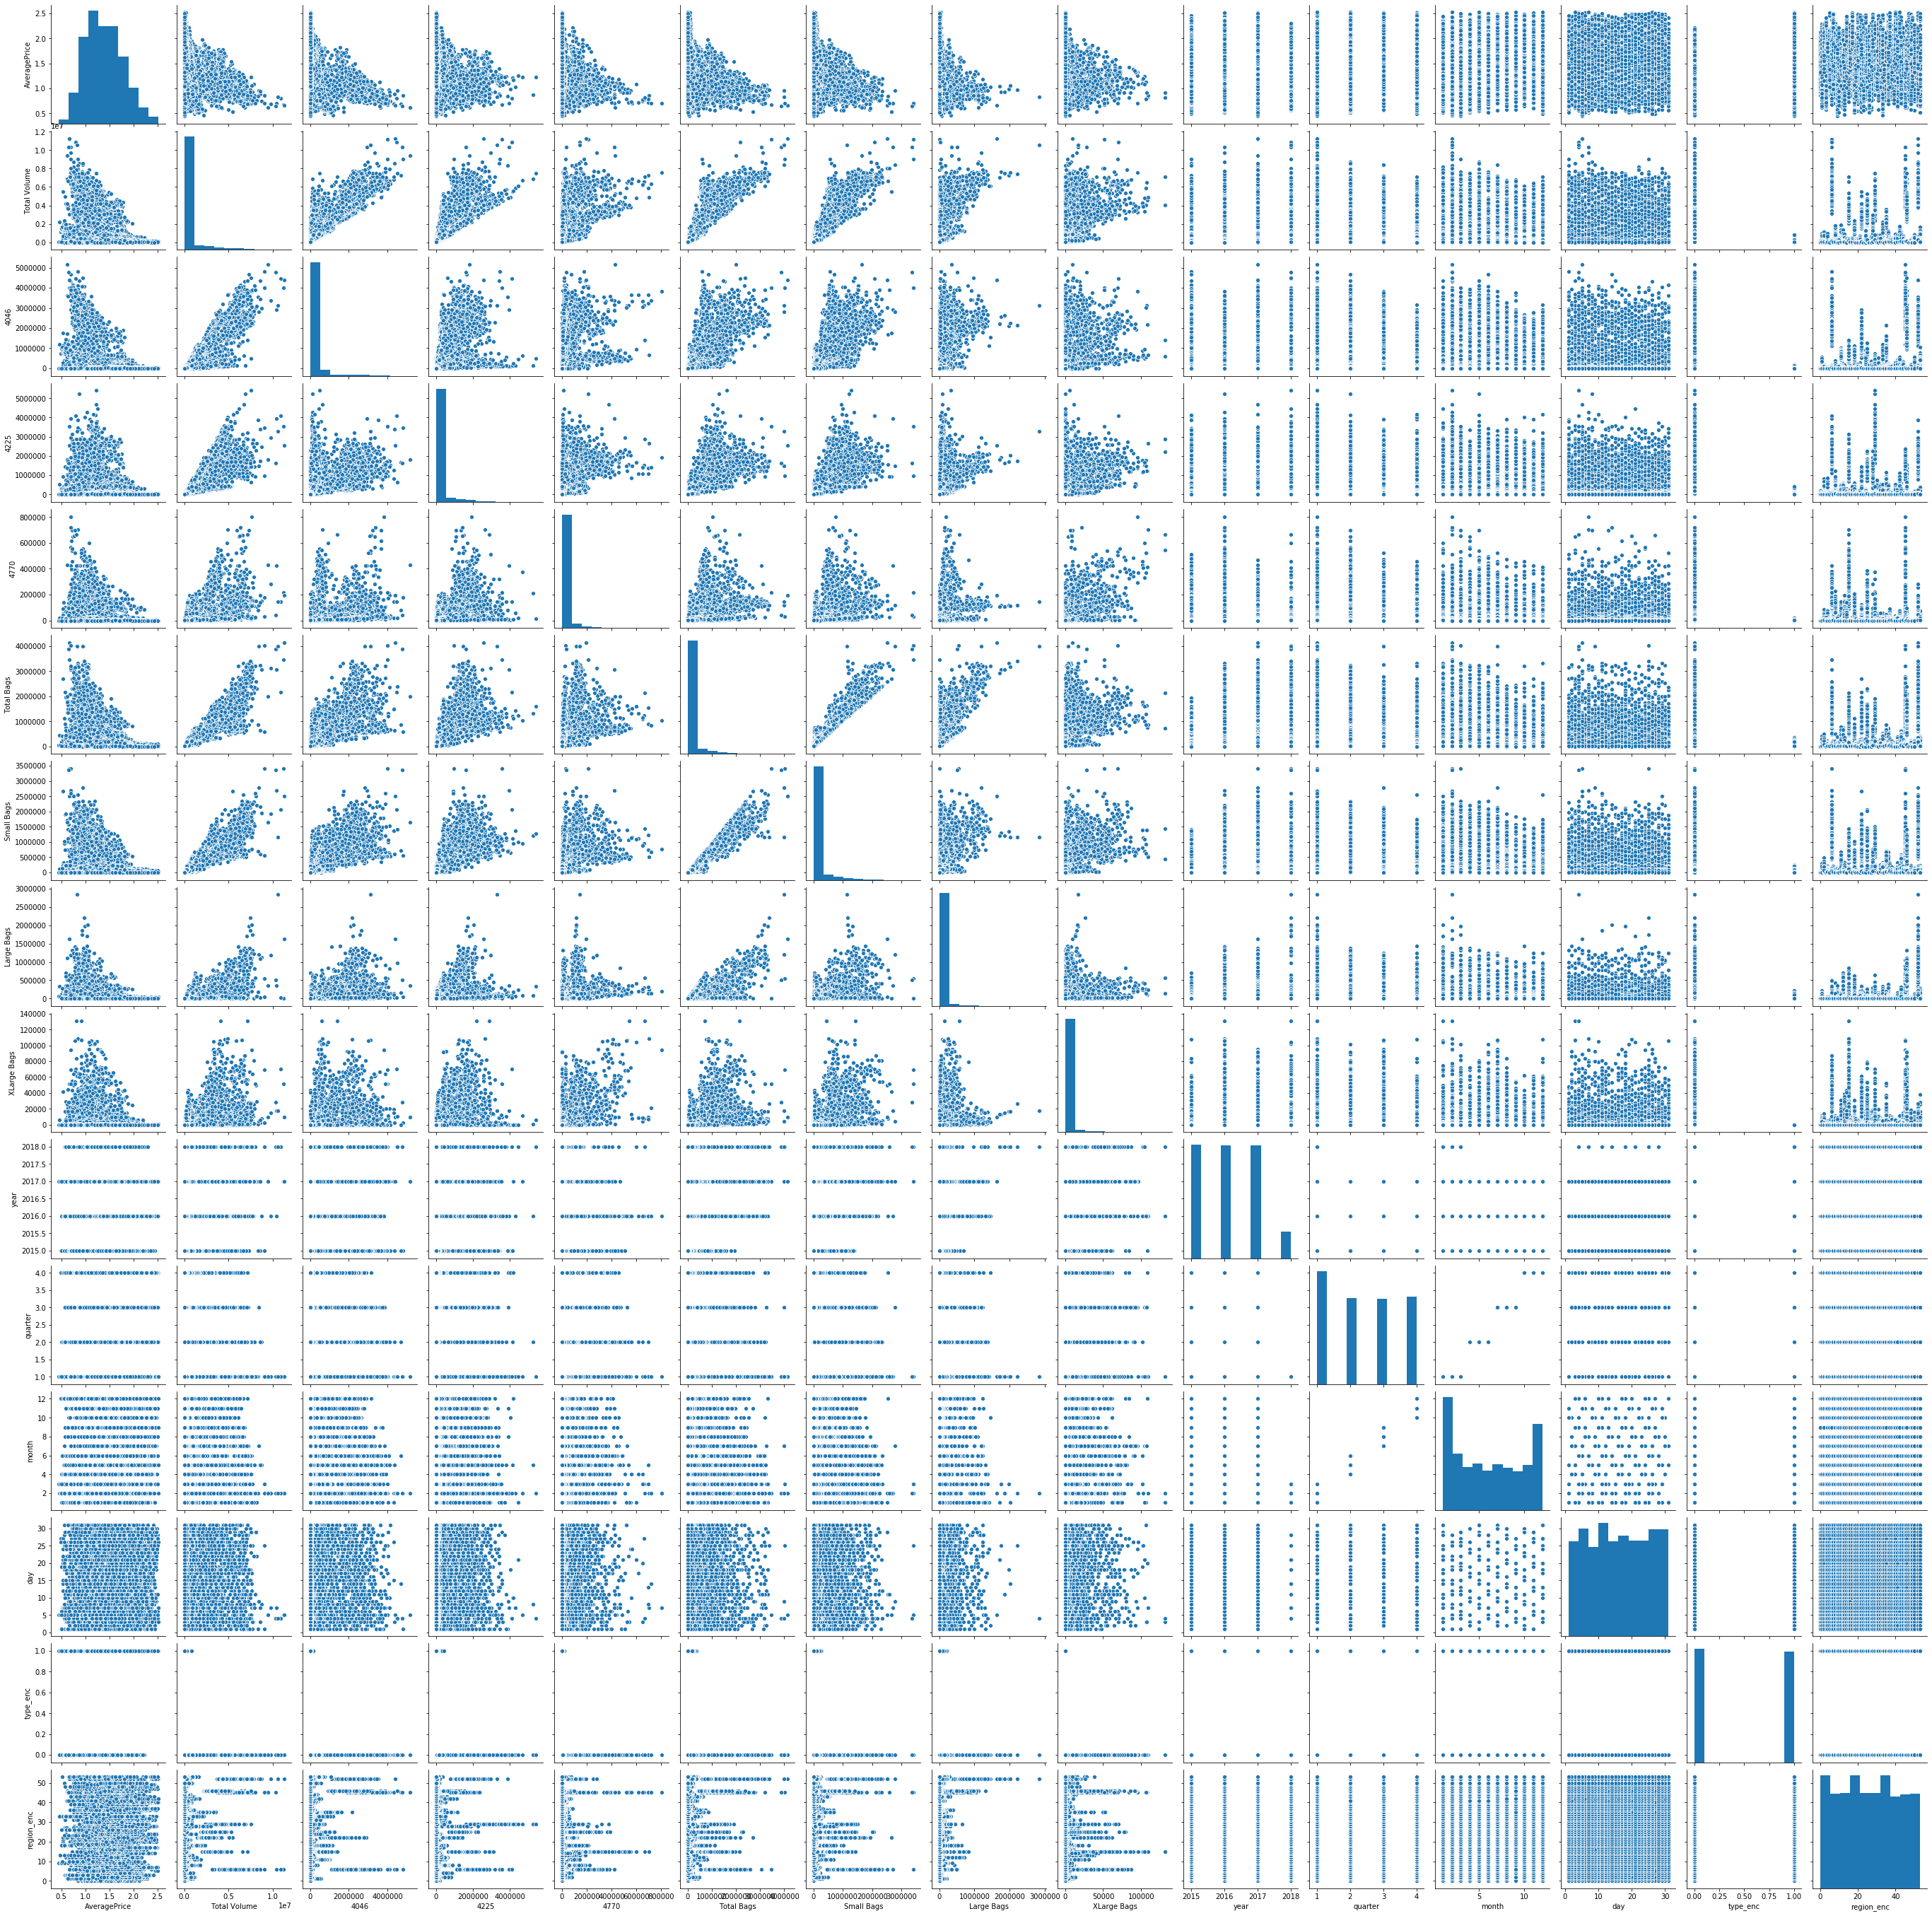

In [31]:
sns.pairplot(df)

In [32]:
features = df[['Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags', 
               'XLarge Bags', 'year', 'quarter', 'month', 'day', 'type_enc']]
target = df[['AveragePrice']]

In [33]:
# use PCA before feature selection/reduction using n_component=1
pca = PCA(n_components=1)
scaler = StandardScaler()

# mean normalisation
features_scaled = scaler.fit_transform(features)
features_1d = pca.fit_transform(features_scaled)
features_1d.shape

(17718, 1)

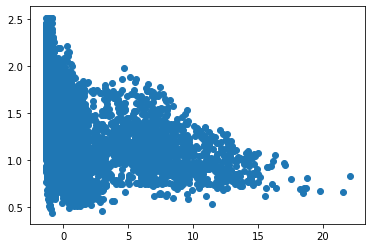

In [34]:
# plot first principal component against target
plt.scatter(features_1d, target)
plt.show() 

### Find out feature importance

In [35]:
print(pca.components_)
print("The most importnant feature is: df['Total Volume'] with a correlation value of ", pca.components_.max())

[[ 0.40548792  0.34939589  0.34928053  0.29284374  0.39552632  0.38930584
   0.29400487  0.26495414  0.03445739 -0.02721468 -0.02664068 -0.00695569
  -0.19601527]]
The most importnant feature is: df['Total Volume'] with a correlation value of  0.40548792202065786


#### Observations:  
* heatmap and pairplot result shows the very similar matirx as 'AveragePrice' vs '4770'/'Large Bags'/'XLarge Bags', which proves correlation of these matrix
* PCA with n_component=1 shows that the dataset is not linear, which gives a hint that we should use non-linear algorithm 
* bar chart shows the importance of features 

### From above scatter matrix, we know that AveragePrice has no direct linear correlation with other features. In order to find the best correlated transformed feature, we will use both SelectKBest and PCA to compare and check the effect

### Feature Selection (SelectKBest)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42)

In [37]:
kbest = SelectKBest(k='all')
kbest.fit(X_train, y_train)

/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest(k='all', score_func=<function f_classif at 0x1a1bedf9e0>)

In [38]:
# best scoring features against target
kbest_scores = pd.DataFrame({'columns': features.columns, 'scores': kbest.scores_}).sort_values(by='scores', ascending=False)
kbest_scores

,columns,scores
12,type_enc,47.111958
1,4046,15.451669
0,Total Volume,12.628478
4,Total Bags,9.586738
5,Small Bags,8.713802
6,Large Bags,7.183329
2,4225,6.597924
3,4770,6.455368
9,quarter,2.945779
8,year,2.804395


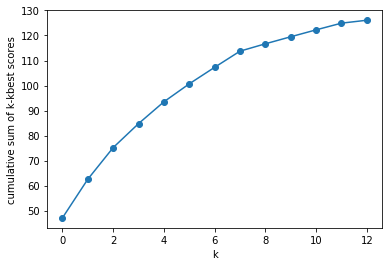

In [39]:
# plot in a graph to find "kink"
plt.plot(kbest_scores['scores'].values.cumsum(), marker='o')
plt.xlabel('k')
plt.ylabel('cumulative sum of k-kbest scores')
plt.show()

In [40]:
# apply the "best" k based on the curve above (where scores increment don't go by much)
kbest = SelectKBest(k=10)

# notice the difference between the two lines below?
X_train_kbest = kbest.fit_transform(X_train, y_train)
X_test_kbest = kbest.transform(X_test)

/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
X_train.columns[kbest.get_support()]

Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'year', 'quarter', 'type_enc'],
      dtype='object')

In [42]:
X_train.shape, X_test.shape

((13288, 13), (4430, 13))

In [43]:
X_train_kbest.shape, X_test_kbest.shape

((13288, 10), (4430, 10))

### Feature Reduction (PCA)

In [44]:
pca = PCA()
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)

pca.fit(X_train_norm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

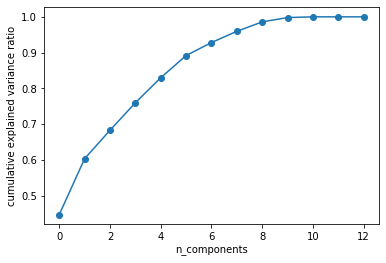

In [45]:
plt.plot(pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('n_components')
plt.ylabel('cumulative explained variance ratio')
plt.show()

In [46]:
pca = PCA(n_components=9)
scaler = StandardScaler()

X_train_pca = pca.fit_transform(scaler.fit_transform(X_train))
X_test_pca = pca.transform(scaler.transform(X_test))

In [47]:
pca.explained_variance_ratio_

array([0.44776755, 0.15613254, 0.07933263, 0.07677642, 0.06989832,
       0.0619409 , 0.03640142, 0.0312306 , 0.02642794])

In [48]:
pca.explained_variance_ratio_.sum()

0.9859083223386292

In [49]:
# how many rows and columns for each before PCA?
X_train.shape, X_test.shape

((13288, 13), (4430, 13))

In [50]:
# how many rows and columns for each after PCA?
X_train_pca.shape, X_test_pca.shape

((13288, 9), (4430, 9))

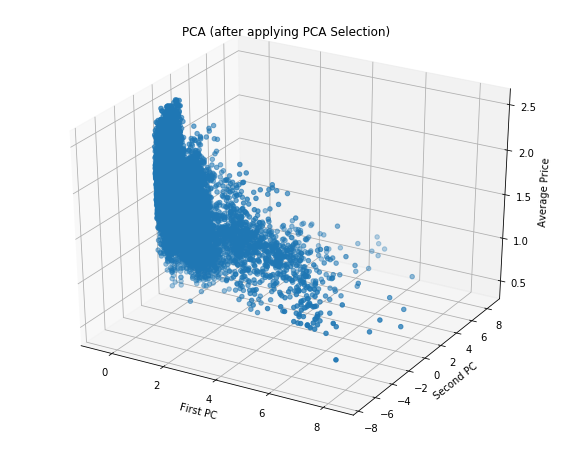

In [51]:
# use 3-D plot to have a better display of data
from mpl_toolkits.mplot3d import Axes3D

# Visualise data using PCA 
pca = PCA(n_components=2)
scaler = StandardScaler()

# mean normalisation
features_scaled = scaler.fit_transform(X_train_pca)
features_2d = pca.fit_transform(features_scaled)

# plot first 2 principal components against target
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(features_2d[:, 0], features_2d[:, 1], y_train)
ax.set_title('PCA (after applying PCA Selection)')
ax.set_xlabel('First PC')
ax.set_ylabel('Second PC')
ax.set_zlabel('Average Price')
plt.show()

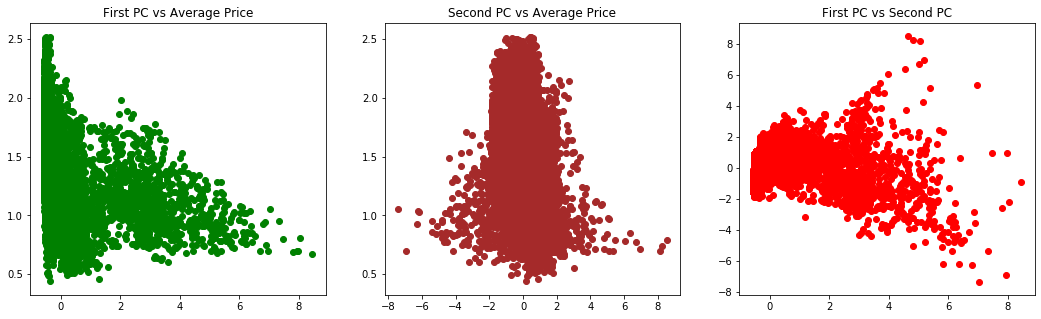

In [52]:
# my machine GPU is not enough to interact with 3d plotting, therefore below is the seperate plots of each axis
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,5))
 
ax1.scatter(features_2d[:, 0], y_train, c='green')
ax2.scatter(features_2d[:, 1], y_train, c='brown')
ax3.scatter(features_2d[:, 0], features_2d[:, 1], c='red')

ax1.set_title('First PC vs Average Price')
ax2.set_title('Second PC vs Average Price')
ax3.set_title('First PC vs Second PC')
plt.show()

#### Observations:
From the results of KBest and PCA, we can see that:
* using KBest doesn't help so much, there is no obvious point where we can choose for (k, kbest score), and if we choose a smaller k, the the scores are lost quite a lot as well
* using PCA slightly helps by reducing the number of features from 13 to 8. The explained variance ratio is 0.959 which is still ok so far

## Section 5: Model Engineering

* Knowing that this dataset is non-linear, using linear regression will not return meaningful results. But below linear regressions are just tryout to give a baseline
* Use non-linear regression algorithm MLPRegressor and RandomForestRegressor
* Use GridSearchCV to split the dataset to 10 folds

In [53]:
from sklearn.linear_model import LinearRegression, SGDRegressor

def fit_model_cross_validate(algorithm, parameters, X_train, y_train, X_test, y_test):
    gs = GridSearchCV(algorithm, parameters, cv=10, verbose=10)
    gs.fit(X_train, y_train)
    print('Best parameters:', gs.best_params_)
    print('Score on test set:', gs.score(X_test, y_test))
    # return both the model and the predictions
    return gs, gs.predict(X_test)

def evaluate_model(X_test, y_test):
    print('MSE', mean_squared_error(X_test, y_test))
    
def check_goodness_of_fit(model, X_train, y_train, X_test, y_test):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    print('Train score:', train_score)
    print('Test score:', test_score)

### Use Linear Regression (just a tryout, R2 score should be very low)

In [54]:
# Linear Regression using PCA features

algorithm = LinearRegression()
params = {} 

print('\nUsing Feature Reduction\n')

lin_model_pca, lin_pred_pca = fit_model_cross_validate(algorithm, params, X_train_pca, y_train, X_test_pca, y_test)

evaluate_model(y_test, lin_pred_pca)

check_goodness_of_fit(lin_model_pca, X_train_pca, y_train, X_test_pca, y_test)


Using Feature Reduction

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV]  ................................................................
[CV] .................................... , score=0.469, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.470, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.453, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.462, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.429, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.464, total=   0.0s
[CV]  .......................................................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


### Using SVR and SGDRegressor (training score should be low too)
As PCA is already a normalized, SVR and SGD don't need feature scaling anymore to converge to a solution

In [55]:
# use SGDRegressor without scaling
algorithm = SGDRegressor()
params = {} 

print('\nUsing Feature Reduction\n')

sgd_model_pca, sgd_pred_pca = fit_model_cross_validate(algorithm, params, X_train_pca, y_train, X_test_pca, y_test)

evaluate_model(y_test, sgd_pred_pca)

check_goodness_of_fit(sgd_model_pca, X_train_pca, y_train, X_test_pca, y_test )


Using Feature Reduction

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV]  ................................................................
[CV] .................................... , score=0.467, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.469, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.450, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.462, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.429, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.461, total=   0.0s
[CV]  .......................................................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was 

In [56]:
# use SVR
algorithm = SVR()
params = {} 

print('\nUsing Feature Reduction\n')

svr_model_pca, svr_pred_pca = fit_model_cross_validate(algorithm, params, X_train_pca, y_train, X_test_pca, y_test)

evaluate_model(y_test, svr_pred_pca)

check_goodness_of_fit(svr_model_pca, X_train_pca, y_train, X_test_pca, y_test)


Using Feature Reduction

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................................... , score=0.612, total=   4.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s
/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................................... , score=0.600, total=   4.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.1s remaining:    0.0s
/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................................... , score=0.635, total=   4.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.1s remaining:    0.0s
/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................................... , score=0.616, total=   3.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   16.1s remaining:    0.0s
/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................................... , score=0.598, total=   3.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   20.0s remaining:    0.0s
/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................................... , score=0.620, total=   3.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   23.9s remaining:    0.0s
/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................................... , score=0.601, total=   4.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   27.9s remaining:    0.0s
/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................................... , score=0.593, total=   3.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   31.8s remaining:    0.0s
/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................................... , score=0.591, total=   3.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   35.7s remaining:    0.0s
/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................................... , score=0.594, total=   3.9s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   39.7s finished
/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters: {}
Score on test set: 0.597017099022698
MSE 0.059376987206070875
Train score: 0.6178808131106417
Test score: 0.597017099022698


In [57]:
preds_df = pd.DataFrame(np.concatenate([y_test, pd.DataFrame(lin_pred_pca), pd.DataFrame(sgd_pred_pca), pd.DataFrame(svr_pred_pca)], axis=1),
                        columns=['y_test','lin_pred_pca', 'sgd_pred_pca', 'svr_pred_pca'])
preds_df

,y_test,lin_pred_pca,sgd_pred_pca,svr_pred_pca
0,1.48,1.195090,1.183038,1.318986
1,1.52,1.638774,1.636276,1.553081
2,1.01,1.195105,1.202308,1.015806
3,1.39,1.773129,1.767059,1.641369
4,1.36,1.316602,1.309640,1.434820
...,...,...,...,...
4425,1.03,1.609331,1.605363,1.492923
4426,1.03,1.083250,1.077452,1.025096
4427,1.55,1.636065,1.615177,1.530122
4428,0.82,1.550073,1.552756,1.638024


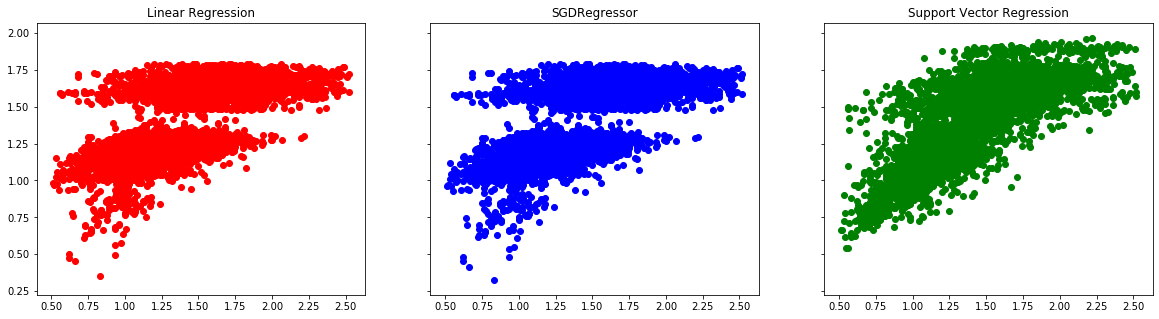

In [58]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,5), sharey=True)
ax1.scatter(preds_df['y_test'], preds_df['lin_pred_pca'], c='red')
ax2.scatter(preds_df['y_test'], preds_df['sgd_pred_pca'], c='blue')
ax3.scatter(preds_df['y_test'], preds_df['svr_pred_pca'], c='green')
ax1.set_title('Linear Regression')
ax2.set_title('SGDRegressor')
ax3.set_title('Support Vector Regression')
plt.show()

#### Observations:
* Using Linear Regression and SGDRegressor both gave very low score 
* Using SVR gave slightly better training score 0.612
* We should choose a more complex model

### Use MLPRegressor
It is suitable for regression prediction problems where a real-valued quantity is predicted given a set of inputs

In [59]:
def iterative_fit(algorithm, X_train, y_train, X_test, y_test, max_epochs):
    model = algorithm
    scores = {'train':[], 'test':[]}
    for i in range(max_epochs):

        # fit 1 epoch (=1 iteration through whole dataset)
        model.partial_fit(X_train, y_train)

        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)
        scores['train'].append(train_score)
        scores['test'].append(test_score)
        
    return scores, model

In [60]:
from sklearn.neural_network import MLPRegressor

algorithm = MLPRegressor(random_state=42)

iterative_scores, mlp_model = iterative_fit(algorithm, X_train_pca, y_train, X_test_pca, y_test, max_epochs=100)

iterative_scores

/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/si

/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/si

/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/si

/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/si

{'train': [0.01104452160197056,
  0.26251537129700675,
  0.39477373884639144,
  0.46572755353711537,
  0.5031664029821988,
  0.5234278703922903,
  0.5355390731992757,
  0.5438520954015551,
  0.5499468677582956,
  0.5547777779772187,
  0.5588745674391449,
  0.5624818647266088,
  0.5655999563393204,
  0.5683629966502604,
  0.5709116466779867,
  0.5733256214676473,
  0.5756611065266133,
  0.5777471353787174,
  0.5797283422803285,
  0.5816520201856192,
  0.5833619257117768,
  0.584956831739298,
  0.586458317638998,
  0.5878678888662188,
  0.5892313373084483,
  0.5905527838297472,
  0.5917828110068017,
  0.5929576955194259,
  0.5940531858373821,
  0.595120098023722,
  0.5960968035050012,
  0.5970464320193825,
  0.5979711996312592,
  0.5988989484720499,
  0.5998144855887688,
  0.6007388987415476,
  0.6015849102298865,
  0.6024520777038045,
  0.6033022735286224,
  0.6041335115894093,
  0.6049807411892087,
  0.6058900781178898,
  0.6067238732140041,
  0.6075102890636945,
  0.6082795453699856,


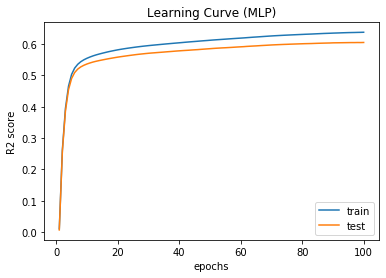

In [61]:
epochs = range(1, len(iterative_scores['train'])+1)
plt.plot(epochs, iterative_scores['train'], label='train')
plt.plot(epochs, iterative_scores['test'], label='test')

plt.title('Learning Curve (MLP)')
plt.xlabel('epochs')
plt.ylabel('R2 score')
plt.legend()
plt.show()

#### Observations:
* MLPRegressor predicts the average price with a slightly improved iterative score 0.6329 compared to SVR
* The learning curve shows this model is still a bit underfitting

### Use RandomForestRegressor
* Random forest algorithm can be used for regression problems
* It typically provides very high accuracy

In [62]:
from sklearn.ensemble import RandomForestRegressor

algorithm = RandomForestRegressor()
params = {} 

print('\nUsing Feature Reduction\n')

rand_model_pca, rand_pred_pca = fit_model_cross_validate(algorithm, params, X_train_pca, y_train, X_test_pca, y_test)

evaluate_model(y_test, rand_pred_pca)

check_goodness_of_fit(rand_model_pca, X_train_pca, y_train, X_test_pca, y_test)


Using Feature Reduction

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] .................................... , score=0.751, total=   7.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.5s remaining:    0.0s
/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] .................................... , score=0.720, total=   7.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.8s remaining:    0.0s
/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] .................................... , score=0.724, total=   7.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   22.2s remaining:    0.0s
/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] .................................... , score=0.711, total=   7.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   29.7s remaining:    0.0s
/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] .................................... , score=0.753, total=   7.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   37.4s remaining:    0.0s
/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] .................................... , score=0.738, total=   7.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   45.1s remaining:    0.0s
/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] .................................... , score=0.719, total=   7.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   52.9s remaining:    0.0s
/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] .................................... , score=0.724, total=   7.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.0min remaining:    0.0s
/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] .................................... , score=0.718, total=   7.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.1min remaining:    0.0s
/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] .................................... , score=0.737, total=   7.7s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.3min finished
/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best parameters: {}
Score on test set: 0.723839180137009
MSE 0.04069055393679459
Train score: 0.9635376958042499
Test score: 0.723839180137009


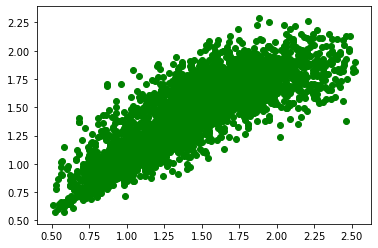

In [63]:
preds_df['rand_pred_pca'] = pd.DataFrame(rand_pred_pca)
plt.scatter(preds_df['y_test'], preds_df['rand_pred_pca'], c='green')

#### Observations:
* Random Forest Regressor has a training score 0.961 which is a very much improvement compared to linear models and MLPRegressor
* Test score shows 0.707 which means the model is overfitting
* Have to do tuning to reduce overfitting

### RandomForestRegressor Tuning
* Use GridSearchCV with Cross Validation to tune the parameters
* Didn't try parameter tuning for other models as the general idea is similar

In [74]:
# print out default parameters
from pprint import pprint
pprint(rand_model_pca.get_params())

{'cv': 10,
 'error_score': nan,
 'estimator': RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False),
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'mse',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 1

In [87]:
grid_search.fit(X_train_pca, y_train)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 43.7min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 59.3min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 77.4min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed: 88.7min finished
/Users/meihonglu/opt/anaconda3/envs/mldds/lib/python3.7/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [93]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train_pca, y_train.values.reshape(-1, 1).ravel())
base_accuracy = evaluate(base_model, X_test_pca, y_test.values.reshape(-1, 1).ravel())

Model Performance
Average Error: 0.1522 degrees.
Accuracy = 88.85%.


In [94]:
grid_search.best_params_
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test_pca, y_test.values.reshape(-1, 1).ravel())
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.1523 degrees.
Accuracy = 88.75%.
Improvement of -0.10%.


## Section 6: Evaluate Metrics
* Use MSE, R Square metrics to evaluate model performance

In [69]:
# consolidate all results without parameter tuning
columns = ['Model','MSE','TrainScore','TestScore', 'Fitting?', 'ParameterTuning?']    

scores = [['Linear Regression', 0.08179274574421021, 0.45039448555979233, 0.44488463443745313, 'NA', 'No'],
         ['SGD Regressor', 0.08180632564291855, 0.44973833262201923, 0.4447924696572247, 'NA', 'No'],
         ['Support Vector Regression', 0.059376987206070875, 0.6178808131106417, 0.597017099022698, 'Overfitting', 'No'],
         ['MLP Regressor', 'NA', 0.6377856441052596, 0.60516814964151, 'Overfitting', 'No'],
         ['Random Forest Regressor', 0.04069055393679459, 0.9635376958042499, 0.723839180137009, 'Overfitting', 'No']]

score_df = pd.DataFrame(scores, columns=columns)
score_df

,Model,MSE,TrainScore,TestScore,Fitting?,ParameterTuning?
0,Linear Regression,0.0817927,0.450394,0.444885,NA,No
1,SGD Regressor,0.0818063,0.449738,0.444792,NA,No
2,Support Vector Regression,0.059377,0.617881,0.597017,Overfitting,No
3,MLP Regressor,NA,0.637786,0.605168,Overfitting,No
4,Random Forest Regressor,0.0406906,0.963538,0.723839,Overfitting,No


In [109]:
# results of Random Forest Regressor WITH parameter tuning
columns = ['Model', 'TrainScore', 'ParameterTuning?']    
scores1 = [['Random Forest Regressor', 0.8875, 'Yes']]
score_df1 = pd.DataFrame(scores1, columns=columns)
score_df1

,Model,TrainScore,ParameterTuning?
0,Random Forest Regressor,0.8875,Yes


## Section 7: Observations and analysis

Answer the following questions:
1. What do you conclude from the metrics?
 
 * for random forest model
    * (without parameter tuning) test score is quite good, but train score shows overfitting 
    * (with parameter tuning) train score decreased
 * linear models are generally given low scores
 * RandomForestRegressor tuning helped reduced the accuracy


2. If the metrics are not good, try to find out what is the reason in order to improve the model. What kind of inputs does the model not do well? (i.e. what are the blind spots or invalid assumptions?). Note that to answer this question, you need to decide what a "good" result is for your problem formulation.

 * RandomForestRegressor Tuning shows result with best parameters and could be used with cross validation to get better prediction
 
 
3. What improvements do you propose?

 * prediction could be more precisely defined based on categorical features, e.g. predicting the average price of different type / region
 * there are many algorithms tried in order to find out the optimal prediction, partially for learning and illustration purpose. The whole project could be more precisely presented when skills stackup
 * feature Date could be used for timeseries prediction
 * classification task could be initalized: predict the type (convention / organic) of avocado
 * the whole project is a bit verdose which can be more precise
 * RandomForestRegressor Tuning part need more study 